In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
df=pd.read_csv("Resources/movie_list.csv")

In [3]:
df.head()


,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
0,0,tt0810819,2015-01-01,15000000,64191523,Drama,Français,DE,Germany,Français,327.94
1,1,tt0884732,2015-01-16,23000000,79799880,Comedy,English,US,United States of America,English,246.96
2,2,tt2250912,2017-07-05,175000000,880166924,Action,English,US,United States of America,English,402.95
3,3,tt1014763,2015-03-15,50000000,3324330,Crime,English,GB,United Kingdom,English,-93.35
4,4,tt1083452,2016-02-26,23000000,46152411,Comedy,Deutsch,DE,Germany,Deutsch,100.66


In [4]:
budget=df["budget"]
profit=df["Profit%"]

In [5]:
#serching for outliers for revenue and for profitability to check data quality
quartiles_pro =profit.quantile([.25,.5,.75])

lowerq_pro = quartiles_pro[0.25]
upperq_pro = quartiles_pro[0.75]

iqr_pro = upperq_pro-lowerq_pro
lower_bound_pro = lowerq_pro - (1.5*iqr_pro)
upper_bound_pro = upperq_pro + (1.5*iqr_pro)
quartiles_pro

0.25    -27.6425
0.50     76.7650
0.75    288.6825
Name: Profit%, dtype: float64

In [6]:
#finding outliers
outlier_pro=df.loc[(df['Profit%']>=upper_bound_pro)|(df['Profit%']<=lower_bound_pro)]

len(outlier_pro["tconst"])
outlier_pro

,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
6,6,tt10963910,2019-08-22,20,1500,,,,,,7400.00
35,35,tt2558022,2016-02-18,10000,525000,Action,Deutsch,DE,Germany,Deutsch,5150.00
42,43,tt2980554,2015-06-13,8245,81379,Drama,English,US,United States of America,English,887.01
65,66,tt3766394,2015-11-27,1000000,14659448,Comedy,English,US,United States of America,English,1365.94
68,69,tt3819668,2015-04-18,5000000,61768190,Action,日本語,JP,Japan,日本語,1135.36
70,71,tt3863552,2015-07-17,13000000,150000000,Action,हिन्दी,IN,India,हिन्दी,1053.85
87,91,tt4432480,2015-07-03,490000,5000000,Horror,?????,IN,India,?????,920.41
90,95,tt4527664,2015-04-04,1500,53889,Comedy,English,US,United States of America,English,3492.60
95,101,tt4644382,2015-07-10,10000000,150000000,Fantasy,广州话 / 廣州話,CN,China,广州话 / 廣州話,1400.00
120,1,tt0096320,1988-12-09,15000000,216614388,Comedy,English,US,United States of America,English,1344.10


In [7]:
quartiles_bud =budget.quantile([.25,.5,.75])

lowerq_bud = quartiles_bud[0.25]
upperq_bud = quartiles_bud[0.75]

iqr_bud = upperq_bud-lowerq_bud
lower_bound_bud = lowerq_bud - (1.5*iqr_bud)
upper_bound_bud = upperq_bud + (1.5*iqr_bud)
outlier_bud=df.loc[(df['budget']>=upper_bound_bud)|(df['budget']<=lower_bound_bud)]
outlier_bud
len(outlier_bud["tconst"])


57

In [8]:
outlier_bud
print(upper_bound_bud)
print(lower_bound_bud)

72000000.0
-40000000.0


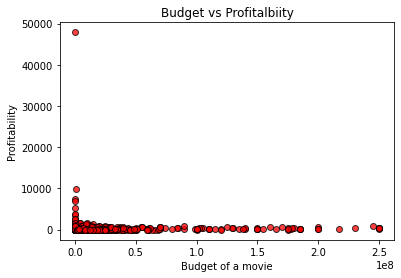

In [9]:
#main scatter plot

x_axis=df['budget']
y_axis=df['Profit%']
plt.figure()
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Budget of a movie")
plt.ylabel("Profitability")
plt.title("Budget vs Profitalbiity")
plt.show()

The movie that is an outlier is "Secret Superstar" per wikipedia is the most profitable movie od all time, 
compared to it's limited budget.

The r-squared is: 0.043600517119420465
The correlation coefficient between budget and profitability is 0.21


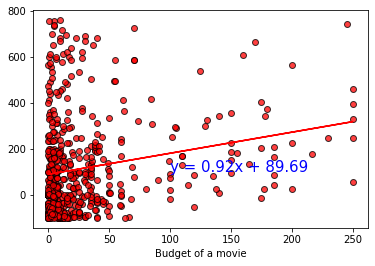

In [20]:
#calc correl
correl=st.pearsonr(x_axis,y_axis)[0]
#main scatter plot with cleaner data without outliers 
df1=df.loc[(df['Profit%']<=upper_bound_pro)&(df['Profit%']>=lower_bound_pro)]
from scipy.stats import linregress
x_axis=df1['budget']/1000000
y_axis=df1['Profit%']
#regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#regression line
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

plt.xlabel("Budget of a movie")
#plt.set_ylabel("Profitability")
#plt.set_title("Budget vs Profitalbiity")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
plt.savefig("scatter_clean")
plt.show()


The r-squared is: 0.08355043769226987
The correlation coefficient between budget and profitability is 0.29


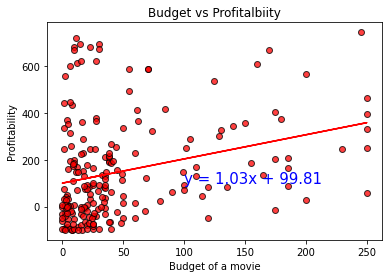

In [21]:
#sctatter for US movies only based on cleaner data
df2=df1.loc[(df1['origin_country']=="US")]
x_axis=df2['budget']/1000000
y_axis=df2['Profit%']
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#regression line
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

plt.xlabel("Budget of a movie")
plt.ylabel("Profitability")
plt.title("Budget vs Profitalbiity")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
plt.savefig("scatter_us_only")
plt.show()

The r-squared is: 0.00472236279352912
The correlation coefficient between budget and profitability is 0.07


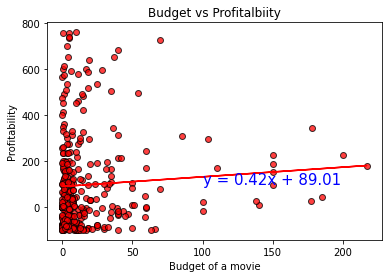

In [22]:
#sctatter for international movies only based on cleaner data
df3=df1.loc[(df1['origin_country']!="US")]
x_axis=df3['budget']/1000000
y_axis=df3['Profit%']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#regression line
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

plt.xlabel("Budget of a movie")
plt.ylabel("Profitability")
plt.title("Budget vs Profitalbiity")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
plt.savefig("scatter_non_us_origin")
plt.show()

In [13]:
#binning to see if there is a scale effect
df1["budget"].max()

250000000

In [14]:
df1["budget"].mean()

29040435.29710145

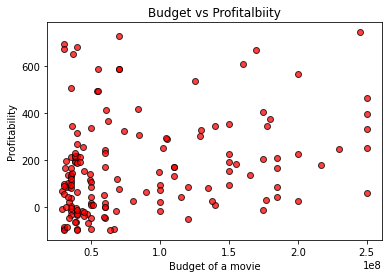

In [15]:
#movies under certain budget or over certain budget-just playing around
df3=df1.loc[(df1['budget']>=29000000)]
x_axis=df3['budget']
y_axis=df3['Profit%']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Budget of a movie")
plt.ylabel("Profitability")
plt.title("Budget vs Profitalbiity")
plt.show()

In [16]:
#grouping together 
dfg=df1.groupby("genres").agg({"budget":"mean","Profit%":["mean"]})

In [17]:
dfg

,budget,Profit%
,mean,mean
genres,,
,1.534659e+06,56.934595
Action,6.481484e+07,159.292054
Adventure,6.239770e+07,189.949286
Animation,3.202523e+07,88.945333
Comedy,1.599821e+07,122.270549
Crime,2.191164e+07,56.250588
Documentary,2.856151e+05,135.066000
Drama,1.484239e+07,81.490635


In [18]:
genre_list1=dfg.index.to_list()

In [19]:
del genre_list1[0]

genre_list1

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']